# Multi-variant

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
tips = pd.read_csv('tips.csv')

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4478071379779230,Sun4608
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6011812112971322,Sun4458
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84,Nathaniel Harris,4676137647685994,Sun5260
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15,Tonya Carter,4832732618637221,Sun2251


In [4]:
titanic = pd.read_csv('train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


## 1. Scatterplot (Numerical - Numerical)

<Axes: xlabel='total_bill', ylabel='tip'>

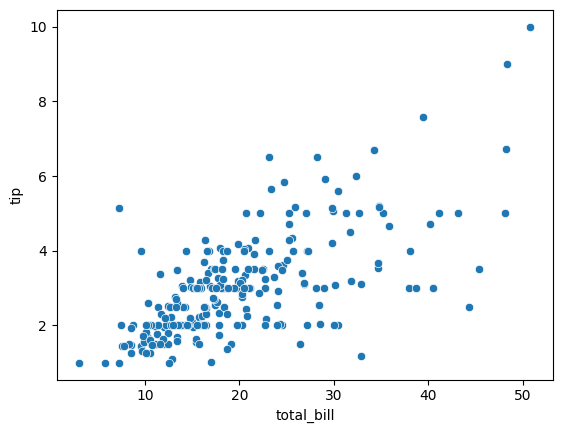

In [8]:
# to find relation between num-num (bivariant)
sns.scatterplot(x = tips['total_bill'], y = tips['tip'])

<Axes: xlabel='total_bill', ylabel='tip'>

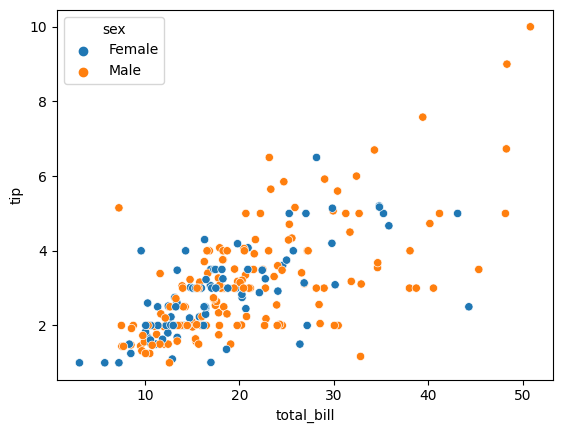

In [9]:
# to find relation between num-num (multivariant)
sns.scatterplot(x = tips['total_bill'], y = tips['tip'], hue = tips['sex'])

<Axes: xlabel='total_bill', ylabel='tip'>

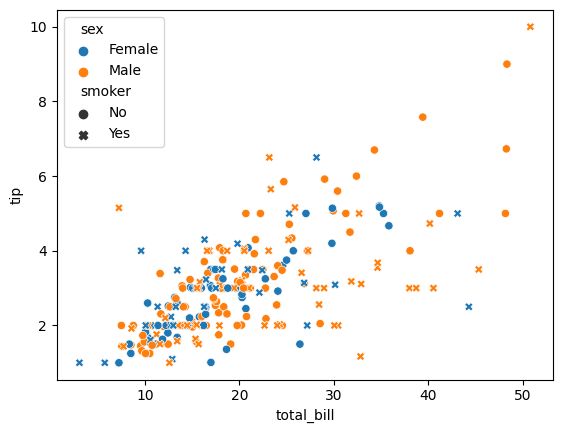

In [10]:
# to find relation between num-num (multivariant)
sns.scatterplot(x = tips['total_bill'], y = tips['tip'], hue = tips['sex'], style = tips['smoker'])

<Axes: xlabel='total_bill', ylabel='tip'>

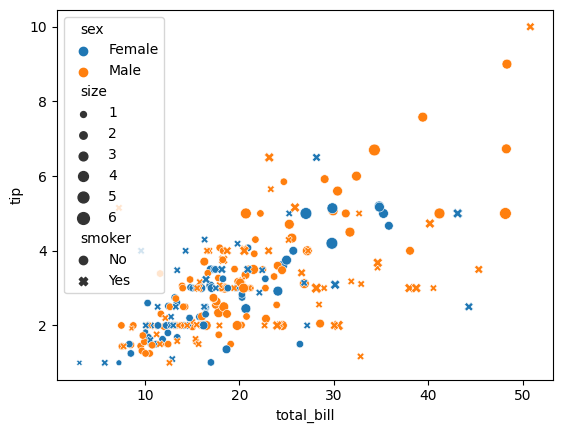

In [11]:
# to find relation between num-num (multivariant)
sns.scatterplot(x = tips['total_bill'], y = tips['tip'], hue = tips['sex'], style = tips['smoker'], size = tips['size'])

## 2. Bar Plot (Numerical - Categorical)
Used when you want to show a numerical and categorical column

<Axes: xlabel='Pclass', ylabel='Age'>

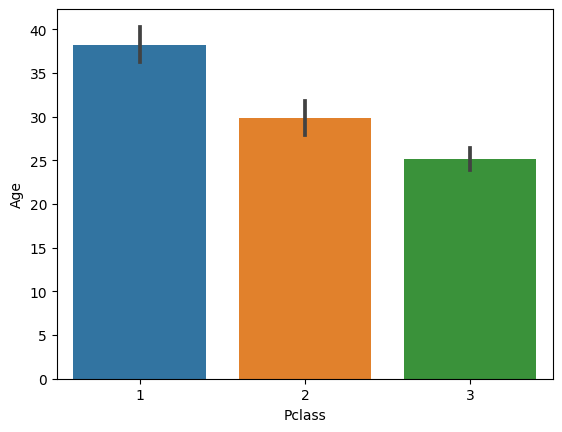

In [13]:
# to find out average age according to pclass of titanic
sns.barplot(x = titanic['Pclass'], y = titanic['Age'])

<Axes: xlabel='Pclass', ylabel='Fare'>

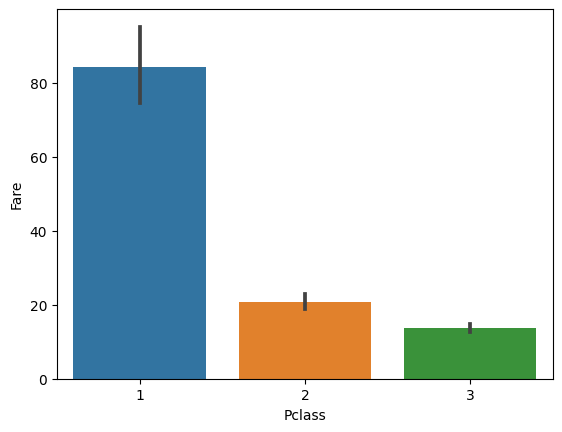

In [14]:
sns.barplot(x = titanic['Pclass'], y = titanic['Fare'])

<Axes: xlabel='Pclass', ylabel='Fare'>

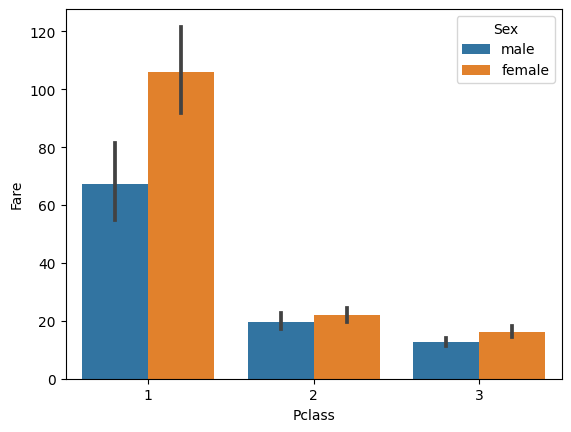

In [15]:
# multivariant
sns.barplot(x = titanic['Pclass'], y = titanic['Fare'], hue = titanic['Sex'])

<Axes: xlabel='Pclass', ylabel='Age'>

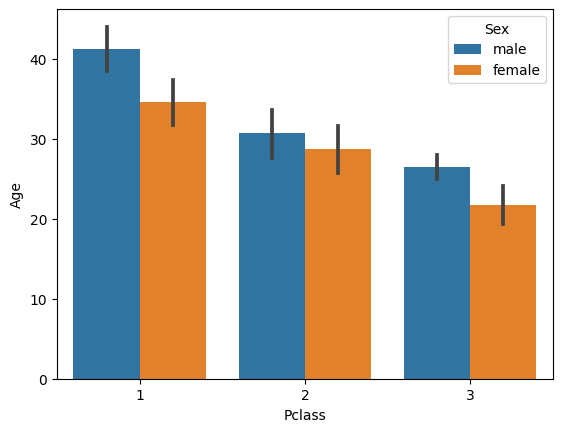

In [16]:
# multivariant
sns.barplot(x = titanic['Pclass'], y = titanic['Age'], hue = titanic['Sex'])

## 3. Box Plot (Numerical - Categorical)

<Axes: xlabel='Sex', ylabel='Age'>

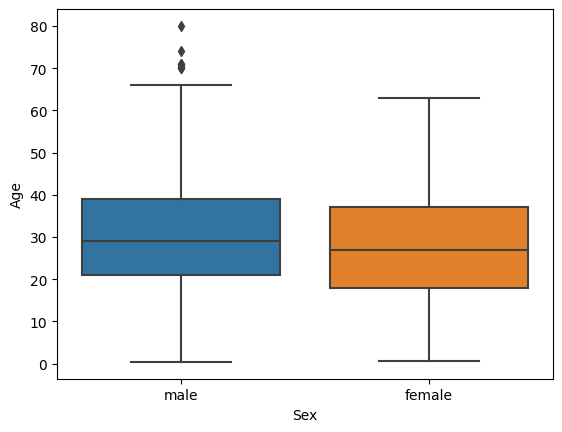

In [17]:
sns.boxplot(x = titanic['Sex'], y = titanic['Age'])

<Axes: xlabel='Sex', ylabel='Age'>

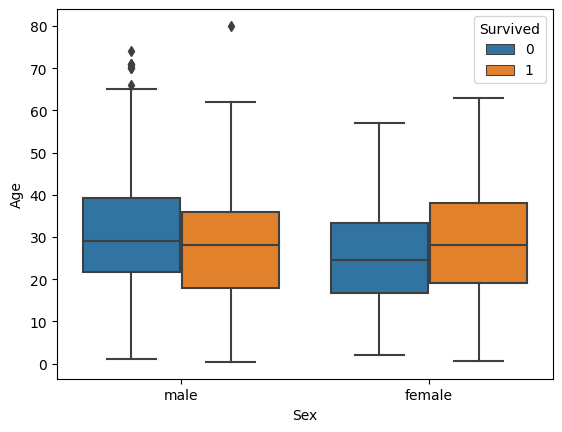

In [18]:
sns.boxplot(x = titanic['Sex'], y = titanic['Age'], hue = titanic['Survived'])

## 4. Distplot (Numerical - Categorical)

<Axes: xlabel='Age', ylabel='Count'>

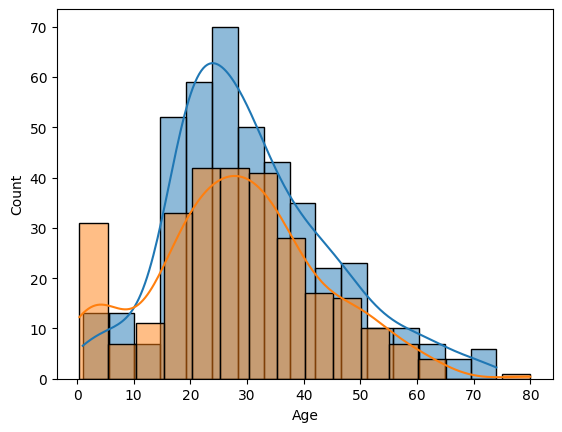

In [27]:
sns.histplot(titanic[titanic['Survived'] == 0]['Age'],kde=True)
sns.histplot(titanic[titanic['Survived'] == 1]['Age'],kde=True)

# blue indicates the probability of dying
# yellow indicates the probability of surviving

<Axes: xlabel='Age', ylabel='Density'>

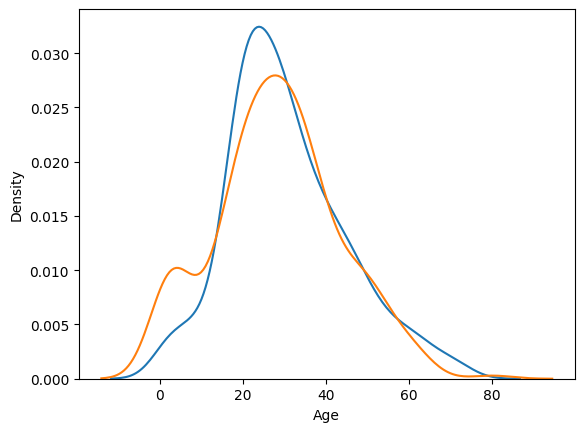

In [31]:
sns.kdeplot(titanic[titanic['Survived'] == 0]['Age'])
sns.kdeplot(titanic[titanic['Survived'] == 1]['Age'])

## 5. HeatMap (Categorical - Categorical)

In [32]:
# finding out the survived with reference to plcass
pd.crosstab(titanic['Pclass'], titanic['Survived'])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


<Axes: xlabel='Survived', ylabel='Pclass'>

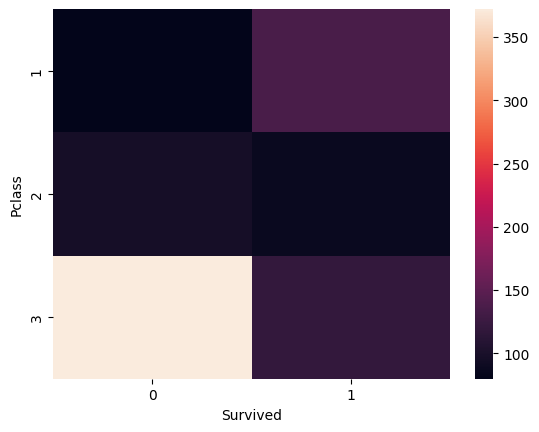

In [33]:
sns.heatmap(pd.crosstab(titanic['Pclass'], titanic['Survived']))

In [45]:
titanic.groupby('Pclass')['Survived'].mean() * 100
# Survived percentage according to pclass

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

<Axes: xlabel='Pclass'>

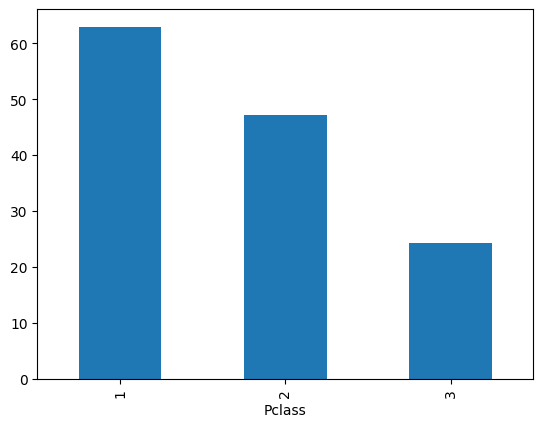

In [44]:
x = titanic.groupby('Pclass')['Survived'].mean() * 100
x.plot(kind = 'bar')

In [46]:
titanic.groupby('Sex')['Survived'].mean() * 100
# Survived percentage according to sex

Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64

In [47]:
titanic.groupby('Embarked')['Survived'].mean() * 100
# Survived percentage according to embark

Embarked
C    55.357143
Q    38.961039
S    33.695652
Name: Survived, dtype: float64

## 6. ClusterMap (Categorical - Categorical)

In [48]:
pd.crosstab(titanic['SibSp'], titanic['Survived'])

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


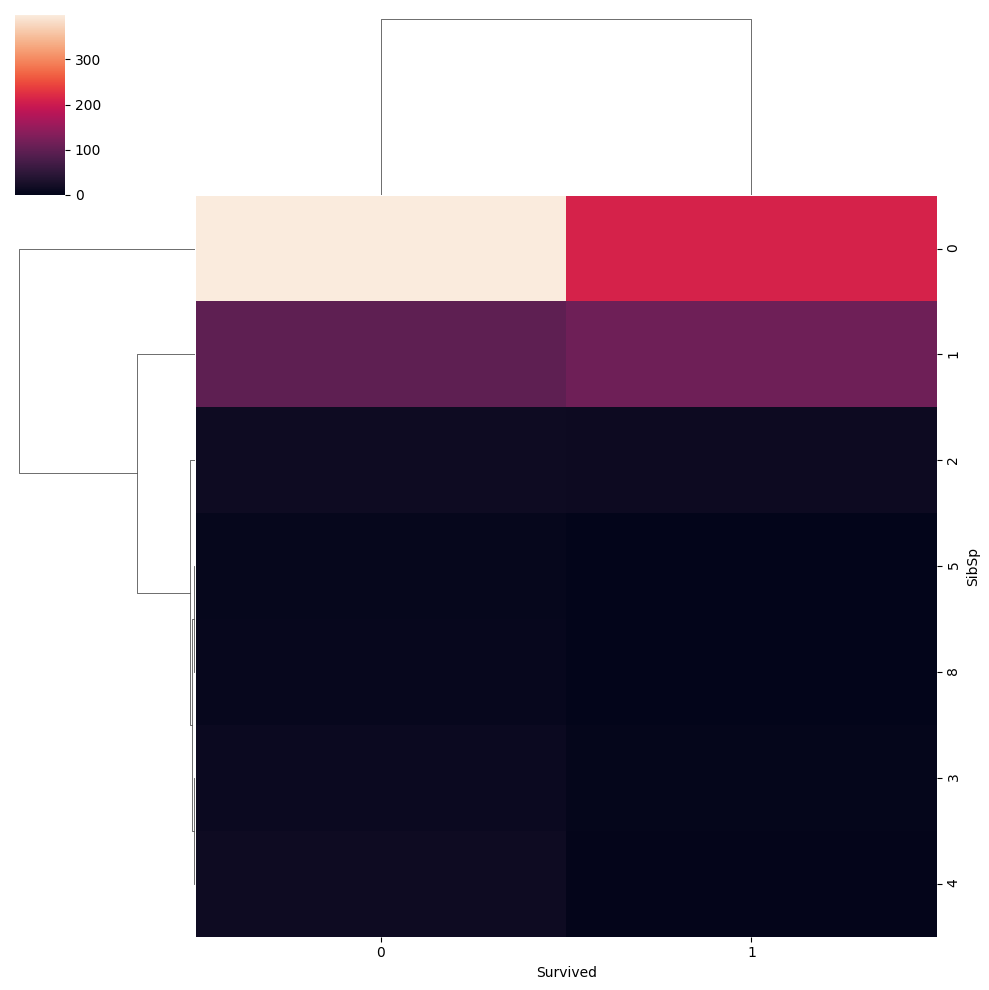

In [49]:
sns.clustermap(pd.crosstab(titanic['SibSp'], titanic['Survived']))

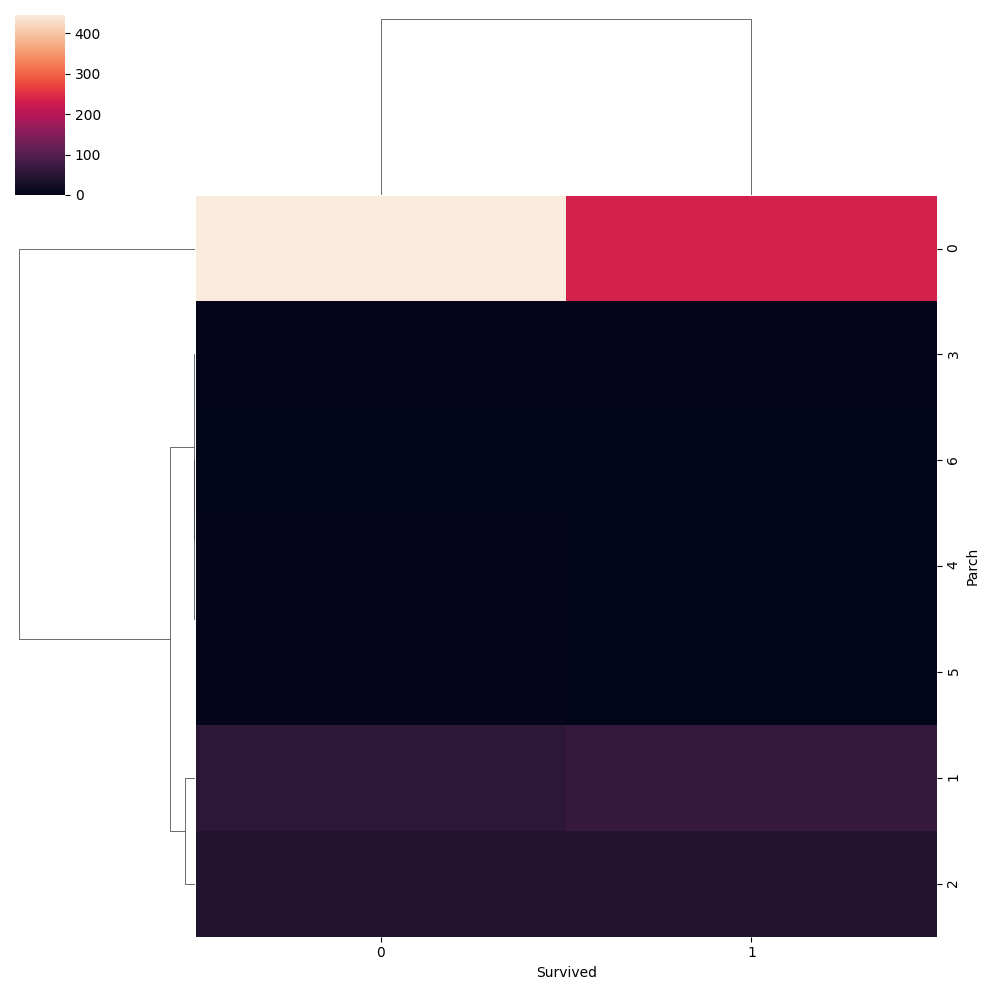

In [51]:
sns.clustermap(pd.crosstab(titanic['Parch'], titanic['Survived']))

## 7. Pairplot
pair plot is used to compare two numerical columns

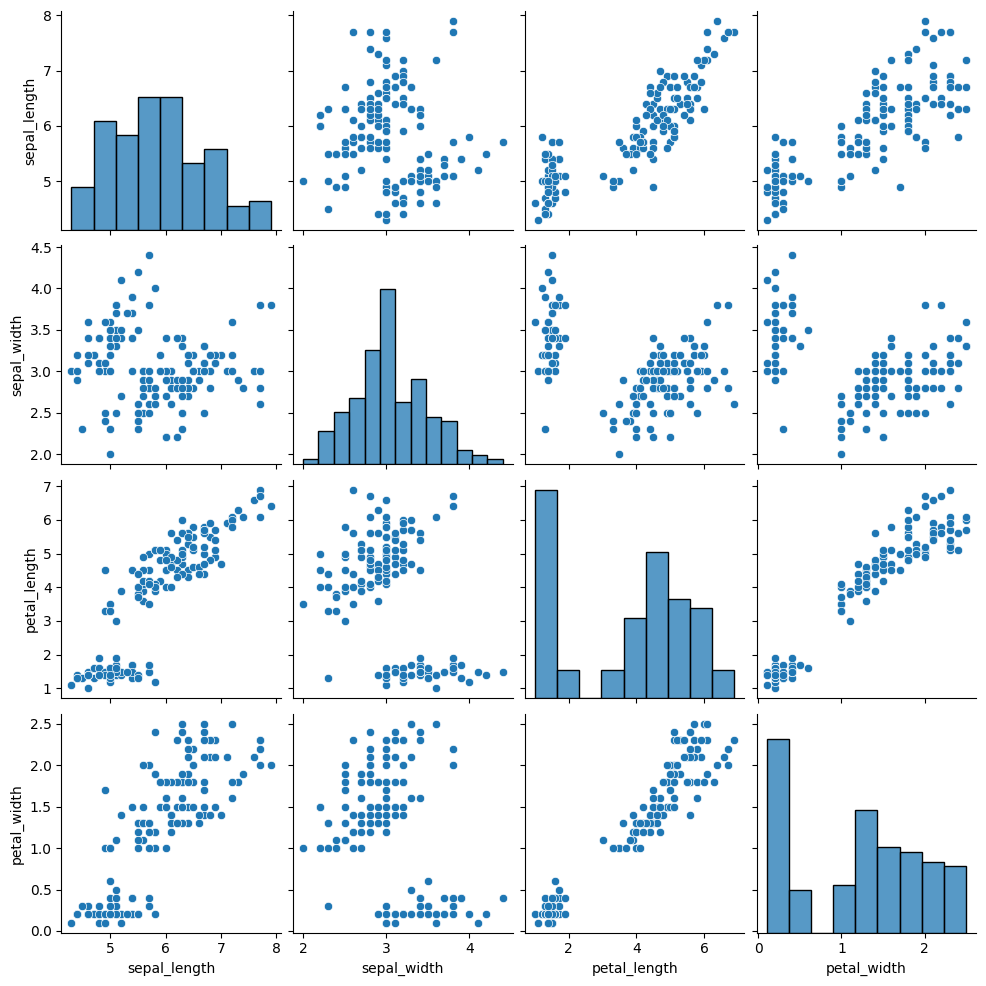

In [52]:
sns.pairplot(iris)

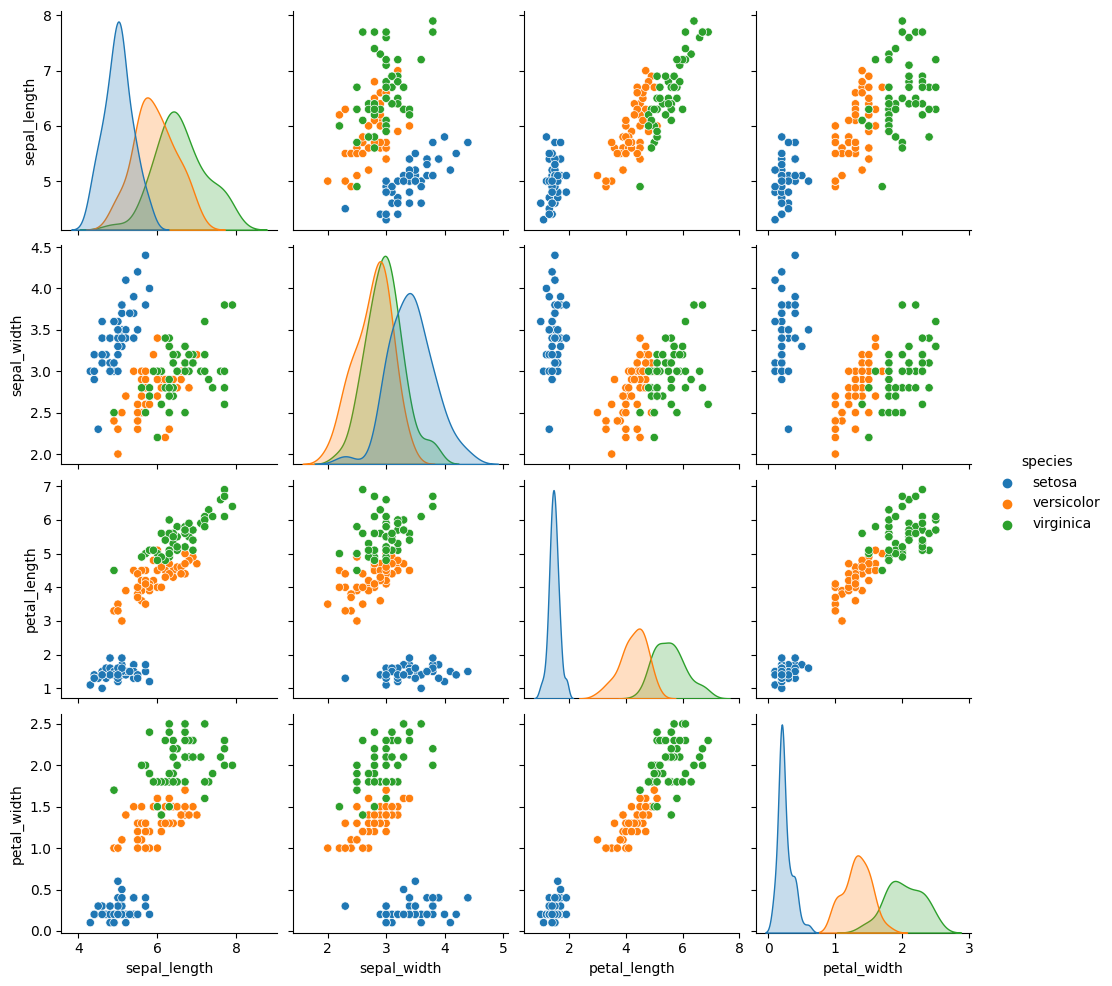

In [54]:
sns.pairplot(iris, hue = 'species')

## 8. Lineplot (Numerical - Numerical)
use this when you have x-axis a time based value

In [64]:
x = flights.groupby('year')['passengers'].sum().reset_index()

<Axes: xlabel='year', ylabel='passengers'>

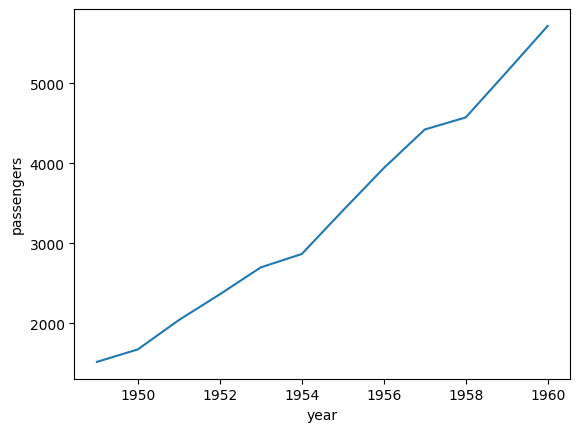

In [67]:
sns.lineplot(x = x['year'],y = x['passengers'])


In [69]:
flights.pivot_table(values = 'passengers', index = 'month', columns = 'year')

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


<Axes: xlabel='year', ylabel='month'>

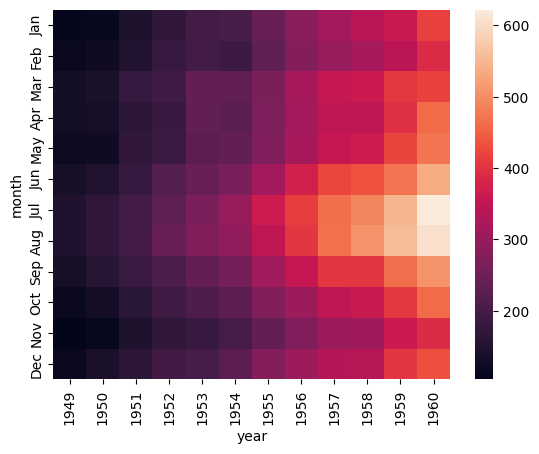

In [70]:
sns.heatmap(flights.pivot_table(values = 'passengers', index = 'month', columns = 'year'))

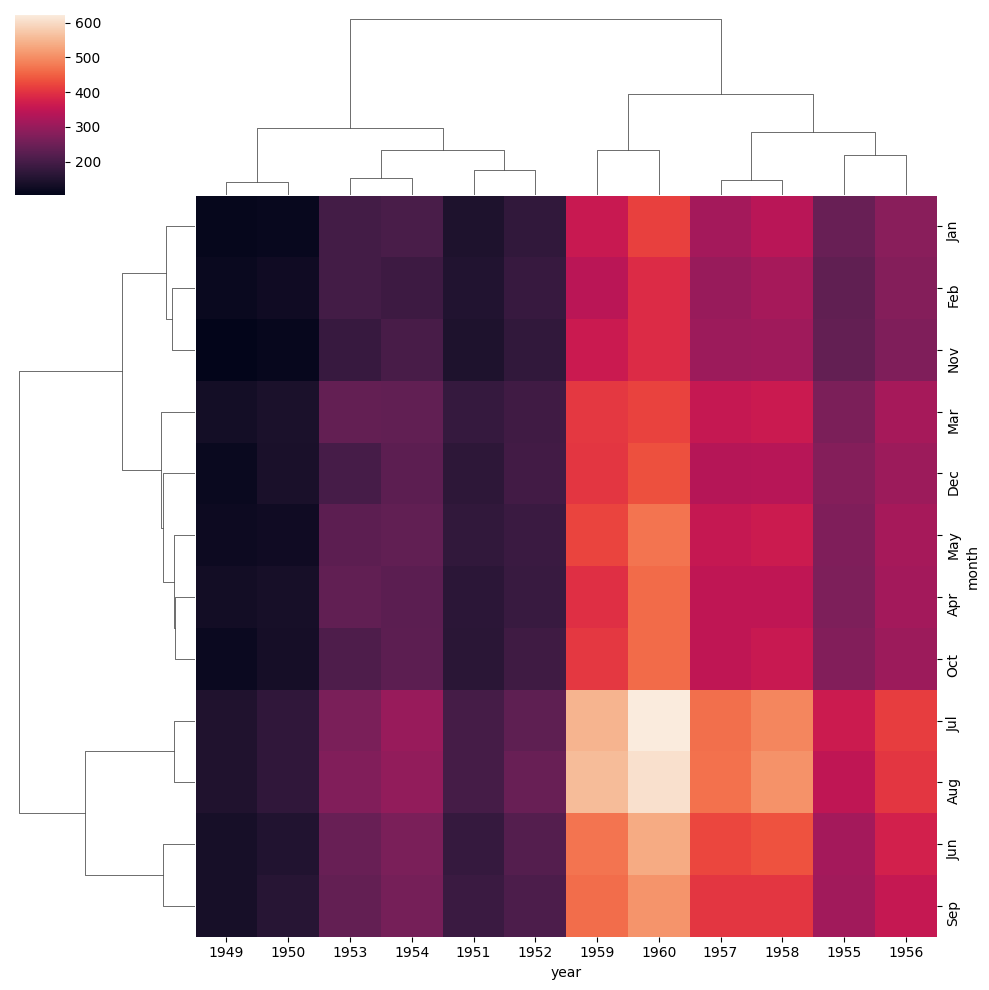

In [71]:
sns.clustermap(flights.pivot_table(values = 'passengers', index = 'month', columns = 'year'))